In [2]:
!pip install torchsummary
!pip install tqdm
!pip install torch
!pip install scikit-image
!pip install sklearn
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# importing the libraries
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random

In [4]:
# # loading images
# train_img = []
# for img_name in tqdm(data['image_names']):
#     image_path = 'emergency_vs_non-emergency_dataset/images/' + img_name
#     img = imread(image_path)
#     img = img/255
#     train_img.append(img)

# train_x = np.array(train_img)
# train_y = data['emergency_or_not'].values
# train_x.shape, train_y.shape

In [5]:
import cv2
import os
import glob
img_dir = "face_images/*"
files = glob.glob(img_dir)
data = []

for f1 in files:
    #imread stores image in rgb so no need to convert from bgr
    img = imread(f1)
    img = img/255
    data.append(img)

train_x = np.array(data)
train_x.shape

(750, 128, 128, 3)

In [6]:
train_x, val_x= train_test_split(train_x, test_size = 0.1, random_state = 13)
(train_x.shape), (val_x.shape)

((675, 128, 128, 3), (75, 128, 128, 3))

In [7]:
train_x[1,:,:].shape

(128, 128, 3)

In [8]:
from skimage.color import rgb2gray

In [9]:
#https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

In [10]:
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [11]:
import argparse
import os

import numpy as np
from PIL import Image
import cv2
from scipy.ndimage.interpolation import rotate


def read_image(imagefile, dtype=np.float32):
    image = np.array(Image.open(imagefile), dtype=dtype)
    return image


def save_image(image, imagefile, data_format='channel_last'):
    image = np.asarray(image, dtype=np.uint8)
    image = Image.fromarray(image)
    image.save(imagefile)

def check_size(size):
    if type(size) == int:
        size = (size, size)
    if type(size) != tuple:
        raise TypeError('size is int or tuple')
    return size


def subtract(image):
    image = image / 255
    return image


def resize(image, size):
    size = check_size(size)
    image = cv2.resize(src=image,dsize=size)
    return image


def center_crop(image, crop_size):
    crop_size = check_size(crop_size)
    h, w, _ = image.shape
    top = (h - crop_size[0]) // 2
    left = (w - crop_size[1]) // 2
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    image = image[top:bottom, left:right, :]
    return image


def random_crop(image, crop_size):
    crop_size = check_size(crop_size)
    h, w, _ = image.shape
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    image = image[top:bottom, left:right, :]
    return image


def horizontal_flip(image, rate=0.5):
    if np.random.rand() < rate:
        image = image[:, ::-1, :]
    return image


def vertical_flip(image, rate=0.5):
    if np.random.rand() < rate:
        image = image[::-1, :, :]
    return image


def scale_augmentation(image, scale_range, crop_size):
    scale_size = np.random.randint(*scale_range)
    image = cv2.resize(src=image, dsize=(scale_size, scale_size))
    image = random_crop(image, crop_size)
    return image


def random_rotation(image, angle_range=(0, 180)):
    h, w, _ = image.shape
    angle = np.random.randint(*angle_range)
    image = rotate(image, angle)
    image = resize(image, (h, w))
    return image



# if __name__ == '__main__':
#     parser = argparse.ArgumentParser(description='Image Data Augmentation')
#     parser.add_argument('infile')
#     parser.add_argument('--outdir', '-o', default='./')
#     parser.add_argument('--n_loop', '-n', type=int, default=1)
#     parser.add_argument('--concat', '-c', action='store_true')
#     args = parser.parse_args()

#     processing_list = ['random_crop', 'horizontal_flip', 'vertical_flip',
#                        'scale_augmentation', 'random_rotation', 'cutout',
#                        'random_erasing']

#     inimg = read_image(args.infile)
#     inimg224 = resize(inimg, 224)
#     if args.concat:
#         if not os.path.exists(args.outdir):
#             os.makedirs(args.outdir)

#         def save_concat_image(outimg_name, func, *func_args):
#             images = []
#             for i in range(args.n_loop):
#                 images.append(func(*func_args))
#             x = int(np.sqrt(args.n_loop))
#             outimg = concat_images(np.array(images), x, x)
#             save_image(outimg, os.path.join(args.outdir, outimg_name))

#         save_concat_image('random_crop.jpg', random_crop, resize(inimg, 400), 224)
#         save_concat_image('horizontal_flip.jpg', horizontal_flip, inimg224)
#         save_concat_image('vertical_flip.jpg', vertical_flip, inimg224)
#         save_concat_image('scale_augmentation.jpg', scale_augmentation, inimg, (256, 480), 224)
#         save_concat_image('random_rotation.jpg', random_rotation, inimg224)
#         save_concat_image('cutout.jpg', cutout, inimg224, inimg224.shape[0] // 2)
#         save_concat_image('random_erasing.jpg', random_erasing, inimg224)

#     else:
#         for processing_name in processing_list:
#             outdir = os.path.join(args.outdir, processing_name)
#             if not os.path.exists(outdir):
#                 os.makedirs(outdir)
#         for i in range(args.n_loop):
#             save_image(
#                 random_crop(resize(inimg, 256), 224),
#                 os.path.join(args.outdir, 'random_crop', '{}.jpg'.format(i)))
#             save_image(
#                 horizontal_flip(inimg224),
#                 os.path.join(args.outdir, 'horizontal_flip', '{}.jpg'.format(i)))
#             save_image(
#                 vertical_flip(inimg224),
#                 os.path.join(args.outdir, 'vertical_flip', '{}.jpg'.format(i)))
#             save_image(
#                 scale_augmentation(inimg, (256, 480), 224),
#                 os.path.join(args.outdir, 'scale_augmentation', '{}.jpg'.format(i)))
#             save_image(
#                 random_rotation(inimg224),
#                 os.path.join(args.outdir, 'random_rotation', '{}.jpg'.format(i)))
#             save_image(
#                 cutout(inimg224, inimg224.shape[0] // 2),
#                 os.path.join(args.outdir, 'cutout', '{}.jpg'.format(i)))
#             save_image(
#                 random_erasing(inimg224),
#                 os.path.join(args.outdir, 'random_erasing', '{}.jpg'.format(i)))

In [12]:
import random
final_train_data = []
final_target_train = []

for i in tqdm(range(train_x.shape[0])):
    
    #random cropping
    final_train_data.append(random_crop(resize(train_x[i], 128),64))
    #scale augmentation
    final_train_data.append(scale_augmentation(train_x[i],(256,480),224))
    #random rotation
    final_train_data.append(random_rotation(train_x[i]))
    #converting rgb to grey
    final_train_data.append(rgb2gray(train_x[i]))
    #random color scaling              
    final_train_data.append(random.uniform(0.6,1.01)*train_x[i,:,:])
    #original
    final_train_data.append(train_x[i])
    
    
    #random brightness
    final_train_data.append(train_x[i]*(random.randint(60,101)/100))
    
    #rotation by 45
    final_train_data.append(rotate(train_x[i], angle=45, mode = 'wrap'))
    #flipping horizontally
    final_train_data.append(np.fliplr(train_x[i]))
    #flipping vertically
    final_train_data.append(np.flipud(train_x[i]))
    #random chance that more than one transformation happens to the image
    if(random.randint(1,101)/100 < 0.4):
        image = train_x[i]
        image = random_crop(resize(image, 128),64)
        image = random_rotation(train_x[i])
        image = scale_augmentation(train_x[i],(256,480),224)
        final_train_data.append(image)
    
#     final_train_data.append(random_noise(train_x[i],var=0.2**2))
    

100%|██████████| 675/675 [00:22<00:00, 29.96it/s]


In [13]:
from skimage import io, color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


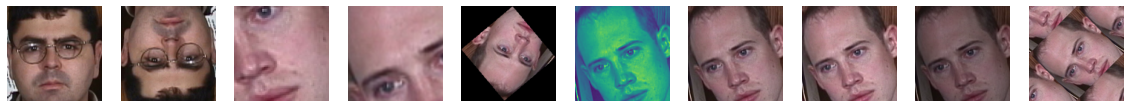

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=10,figsize=(20,20))
for i in range(10):
    ax[i].imshow(final_train_data[i+30])
    #x[i].imshow(final_train_data[i+30])
    ax[i].axis('off')

In [15]:
from skimage import io, color

In [16]:
lab = color.rgb2lab(final_train_data[0])

In [23]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = color.lab2rgb(z)
    return(z)

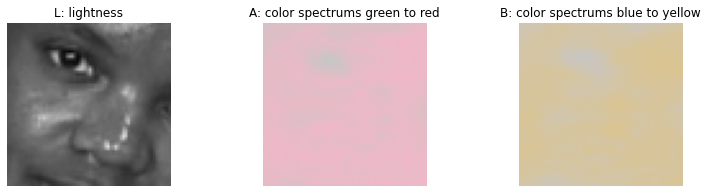

In [24]:
count = 1
Nsample = 1
fig = plt.figure(figsize=(13,3*Nsample))


ax = fig.add_subplot(Nsample,3,count)
lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,0) 
ax.imshow(lab_rgb_gray); ax.axis("off")
ax.set_title("L: lightness")
count += 1

ax = fig.add_subplot(Nsample,3,count)
lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,1) 
ax.imshow(lab_rgb_gray); ax.axis("off")
ax.set_title("A: color spectrums green to red")
count += 1

ax = fig.add_subplot(Nsample,3,count)
lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,2) 
ax.imshow(lab_rgb_gray); ax.axis("off")
ax.set_title("B: color spectrums blue to yellow")
count += 1
plt.show()